<a href="https://colab.research.google.com/github/vanecornejo/EDP-II/blob/main/M%C3%A9todo%20de%20Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método de Galerkin**

Tenemos el problema de contorno
$$ - u''(x) + u(x) - x = 0, \quad 0 \le x \le 1 $$

con condiciones de frontera:

$$ u(0) = u(1) = 0 $$

Se va a resolver el ejercicio propuesto con el método de Galerkin, el cual consiste en aproximar la solución exacta por una combinación lineal de funciones base:

$$ u_n(x) = \sum_{i=1}^n \alpha_i \beta_i(x) $$

donde:
- $\beta_i(x)$ son funciones base que cumplen las condiciones de frontera,
- $\alpha_i$ son coeficientes desconocidos.

La característica principal del método es que las **funciones de peso coinciden con las funciones base**, es decir:

$$ \int_0^1 R(x)\,\beta_i(x)\,dx = 0, \quad i=1,\dots,n $$

donde $R(x)$ es el residuo obtenido al sustituir la aproximación en la ecuación diferencial.


In [1]:
# Importamos librería necesaria
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Resolvemos de forma analítica.

In [2]:
x = sp.symbols('x')  # Variable
u = sp.Function('u')  # Función u(x)

In [3]:
# EDP que se va a resolver:
ode = -u(x).diff(x,2) + u(x) - x
ode

-x + u(x) - Derivative(u(x), (x, 2))

In [4]:
# La solución general con condiciones:
sol = sp.dsolve(ode, u(x), ics={u(0):0, u(1):0})
sol

Eq(u(x), x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2)))

In [5]:
# Convertimos la expresión de la solución en una función numérica para evaluar
u_expr = sol.rhs
u_num = sp.lambdify(x, u_expr, "numpy")

Graficamos la solución exacta:

In [6]:
xx = np.linspace(0, 1, 100)
yy = u_num(xx)

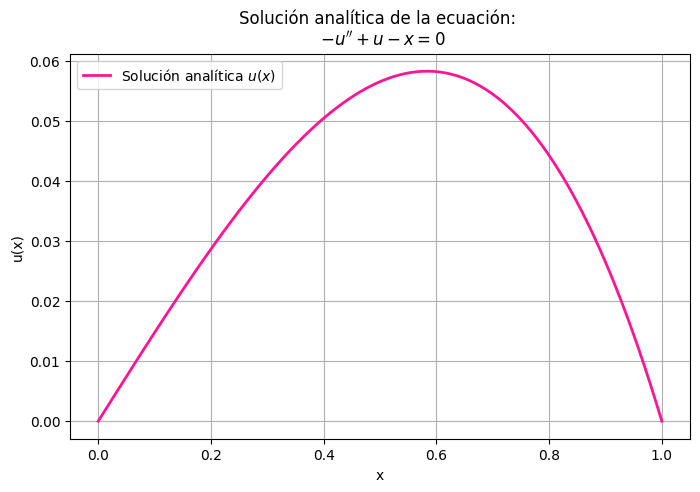

In [7]:
plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="Solución analítica $u(x)$", linewidth=2, color="deeppink")
plt.title("Solución analítica de la ecuación: \n $-u'' + u - x = 0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

Para la solución por aproximación se usa:

$$ \beta_i(x) = \sin(i\pi x), \quad i = 1,2,3 $$

cumpliendo con las condiciones de frontera:

$$ \beta_i(0) = \beta_i(1) = 0 $$

Por lo tanto, la aproximación es:

$$ u_3(x) = \alpha_1 \sin(\pi x) + \alpha_2 \sin(2\pi x) + \alpha_3 \sin(3\pi x) $$

donde no conocemos $\alpha_1, \alpha_2, \alpha_3$


In [8]:
# Coeficientes desconocidos
a1, a2, a3 = sp.symbols('a1 a2 a3')

In [9]:
# Función aproximada
u_approx = a1*sp.sin(sp.pi*x) + a2*sp.sin(2*sp.pi*x) + a3*sp.sin(3*sp.pi*x)

In [10]:
# Residuo
R = -sp.diff(u_approx, x, 2) + u_approx - x
R = R.simplify()
R

a1*sin(pi*x) + a2*sin(2*pi*x) + a3*sin(3*pi*x) - x + pi**2*(a1*sin(pi*x) + 4*a2*sin(2*pi*x) + 9*a3*sin(3*pi*x))

Las ecuaciones para determinar los coeficientes $\alpha_i$ se obtienen con:

$$ \int_0^1 R(x)\sin(i\pi x)\,dx = 0, \quad i=1,2,3 $$

Por lo que tenemos ahora un sistema de tres ecuaciones algebraicas con tres incógnitas. Lo vamos a resolver usando la librería sympy.


In [11]:
# Integrales de Galerkin
I1 = sp.integrate(R*sp.sin(sp.pi*x), (x,0,1))
I2 = sp.integrate(R*sp.sin(2*sp.pi*x), (x,0,1))
I3 = sp.integrate(R*sp.sin(3*sp.pi*x), (x,0,1))

In [12]:
# Resolver sistema para alpha_i
sol_alpha = sp.solve([I1, I2, I3], [alpha1, alpha2, alpha3], simplify=True)
sol_alpha

NameError: name 'alpha1' is not defined

In [ ]:
# Función aproximada con coeficientes
u_galerkin = u_approx.subs(sol_alpha)
u_galerkin_fn = sp.lambdify(x, u_galerkin, "numpy")

Graficamos la solución analítica y la solución de la aproximación con el Método de Galerkin para comparar ambas soluciones.

In [ ]:
yy_approx = u3_num(xx)  # Valores de u_3(x)

plt.figure(figsize=(9,5))
plt.plot(xx, yy, label="Solución analítica", linewidth=2)
plt.plot(xx, yy_approx, "--", label="Aproximación Galerkin (n=3)", linewidth=2)
plt.title("Comparación de Soluciones Analítica y por Galerkin")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

Vamos a calcular y graficar el error de la aproximación.

El valor absoluto es:

$$ E(x) = \left| u_{\text{exacta}}(x) - u_{\text{Galerkin}}(x) \right| $$

Evaluando en el intervalo $[0,1]$

In [ ]:
error = np.abs(u_galerkin_fn(xx) - yy)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(xx, error, label="Error absoluto", color='red', linewidth=2)
plt.title("Error absoluto de la aproximación Galerkin")
plt.xlabel("x")
plt.ylabel("|u_exacta - u_Galerkin|")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Error máximo
max_error = np.max(error)
max_error

In [ ]:
pi = sp.pi  # Símbolo pi

# Calculamos los \alpha_i para i=1,2,3
alphas = []
for i in range(1, 4):
    integ = sp.integrate(x * sp.sin(i * pi * x), (x, 0, 1))  # \int x sin(i π x) dx
    alpha = 2 * integ / ((i * pi)**2 + 1)  # Fórmula para \alpha_i
    alphas.append(alpha)
    print(f"Para i={i}, integral = {integ}, alpha_{i} = {alpha}")

# Expresión simbólica de u_3(x)
u3_expr = sum(alphas[j-1] * sp.sin(j * pi * x) for j in range(1, 4))
print("Aproximación u_3(x):", u3_expr)

# Convertimos en función numérica
u3_num = sp.lambdify(x, u3_expr, "numpy")

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(xx, u_galerkin_fn(xx), label="Solución Galerkin", linewidth=2)
plt.plot(xx, yy, "--", label="Solución exacta", linewidth=2)
plt.title("Comparación: Solución analítica vs Galerkin")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()


Error absoluto de ambas soluciones